In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [80]:
customers = pd.read_csv(r"C:\PAULDATA\Data Analyst Labs\mall_customers.csv")
customers.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


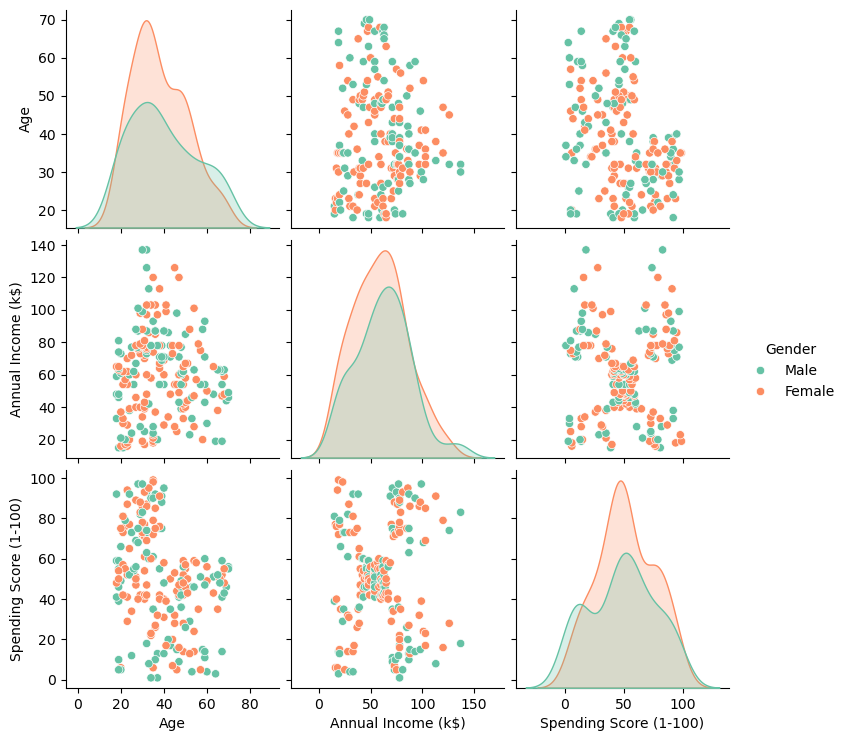

In [90]:
# Draw Pairplot of the Data (assume the Target is 'Gender')
sns.pairplot(data=customers.drop(['CustomerID'], axis=1), hue='Gender', palette='Set2')

In [24]:
# Grab the Features data
X = customers.iloc[:,2:4].values
x = customers.iloc[:,2].values
x = x.reshape(-1,1)

# Find the best number of Clusters (K, in KMeans Function, this number is specified as 'n_clusters')
wcss = []
maxrange = 15
for i in range(1,maxrange):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X) # start to put all the datapoints in the cluster

    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

176108.78000000003
87159.30436535942
59525.857573798756
39529.88796736351
31659.353138717823
28132.286962397444
22665.45851491739
19491.681320054257
16506.333270594143
14954.234085400452
12245.451956328045
11760.197193178925
10600.96327784217
9627.831828376933


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

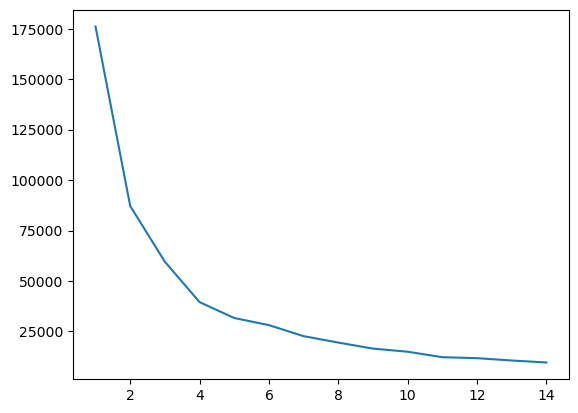

In [25]:
# Plot the WCSS values for investigating the possible K values
plt.plot(range(1,maxrange), wcss)
plt.xlabel = 'k-values'
plt.ylabel = 'wcss'
plt.show()

# From this plot, we see the elbow is around 5 or 6.
# Next we can continue with K-means prediction.

In [26]:
# Apply K-means Clustering Algorithm on the Data with the decided K value (5)
kmeans2 = KMeans(n_clusters = 5, init='k-means++')
kmeans2.fit(X) # start diving all the data points into 5 clusters/groups

y = kmeans2.predict(X) # tells us which datapoint is put into which cluster

# Check the result of Unsupervised Learning by K-Means Clustering Algorithm
print(y)

# Check the number of rows of the output
print(len(y))

# Check the data type of output
print(type(y[0]))

[3 3 3 3 3 3 3 3 0 3 0 3 0 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 0 3 0 3 0 3 3
 3 3 3 0 3 0 3 0 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 2 4 2 2 4 2 2 2 0 2 4 2 2 4 4 2 2 4 2 2 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
 4 4 4 4 4 2 2 2 2 4 4 4 4 4 4 2 4 2 4 2 4 4 4 4 4 2 4 4 4 2 4 4 4 4 4 2 4
 4 4 4 4 2 4 2 4 4 4 4 4 2 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
200
<class 'numpy.int32'>


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
cust2 = customers[['Age','Annual Income (k$)']]

# Add the Cluster column to original Dataframe
cust2['cluster'] = pd.DataFrame(y)
print(cust2)

     Age  Annual Income (k$)  cluster
0     19                  15        3
1     21                  15        3
2     20                  16        3
3     23                  16        3
4     31                  17        3
..   ...                 ...      ...
195   35                 120        1
196   45                 126        1
197   32                 126        1
198   32                 137        1
199   30                 137        1

[200 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


C:\Windows\Temp\ipykernel_7504\2844945871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust2['cluster'] = pd.DataFrame(y)


In [ ]:
# Plot with Seaborn

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

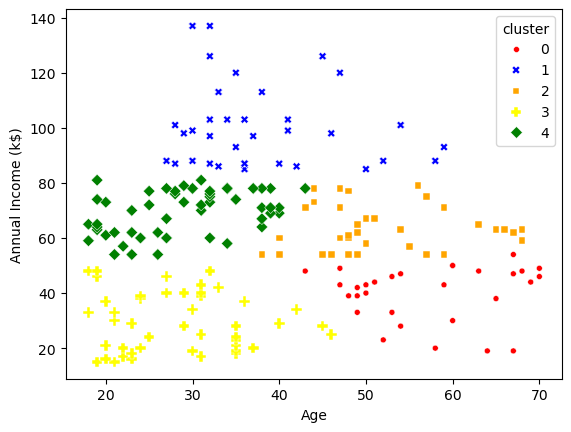

In [54]:
# We can plot up to 5 columns of data (5-dimension data points) with Seaborn (x, y, color/hue, size, shape/style)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=cust2, hue='cluster', size='cluster', style='cluster', palette=['red','blue','orange','yellow','green'])

In [63]:
customers = pd.read_csv(r'C:\PAULDATA\Data Analyst Labs\mall_customers.csv')
customers.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [66]:
X = customers.iloc[:,2:4].values
X[0:3]

array([[19, 15],
       [21, 15],
       [20, 16]], dtype=int64)

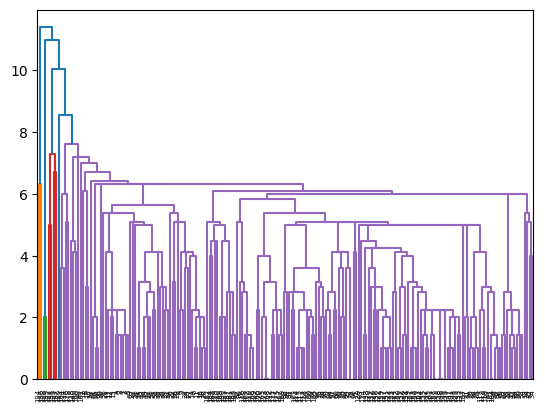

In [68]:
# Plot the Dendrogram of Data Points
# Single Linked
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title='Dendrogram'
plt.xlabel='Customers'
plt.ylabel='Euclidean Distances'
plt.axhline(y=394, color='b', linestyle='--')
plt.axhline(y=265, color='b', linestyle='--')
plt.axhline(y=244, color='r', linestyle='--')
plt.axhline(y=115, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal lines

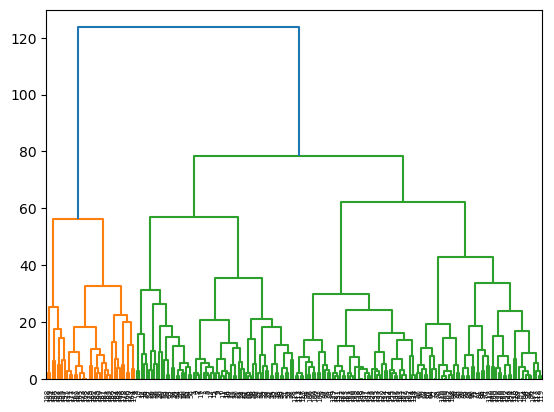

In [69]:
# Complete Linked
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))

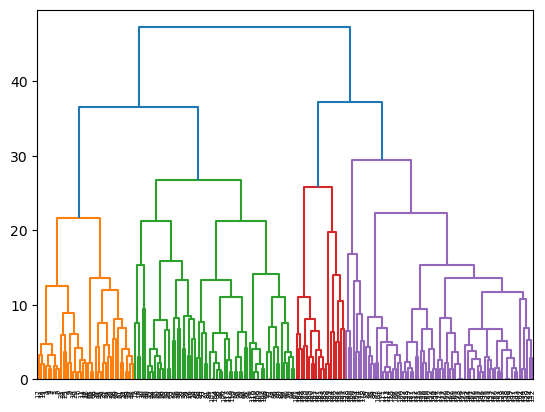

In [70]:
# Average Linked
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))

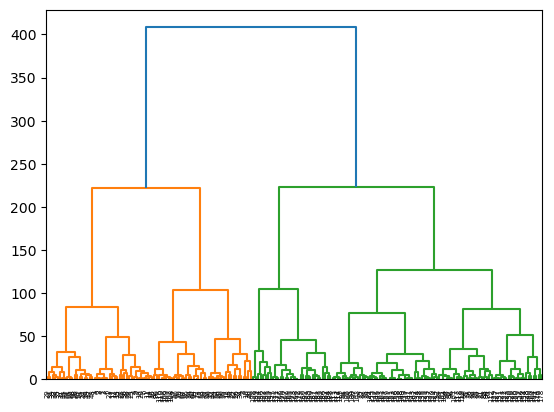

In [71]:
# Ward Linked
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [72]:
# Apply Agglomerative Clustering on the Data
from sklearn.cluster import AgglomerativeClustering
nclust = 5
linkage = 'ward'
agg_cluster = AgglomerativeClustering(n_clusters = nclust, metric='euclidean', linkage=linkage)
y_hc = agg_cluster.fit_predict(X)

In [73]:
y_hc

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [75]:
cust3 = customers[['Age','Annual Income (k$)']]
cust3.head(3)

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16


In [77]:
cust3['cluster'] = pd.DataFrame(y_hc)

C:\Windows\Temp\ipykernel_7504\1256555505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust3['cluster'] = pd.DataFrame(y_hc)


In [78]:
cust3.head(3)

,Age,Annual Income (k$),cluster
0,19,15,3
1,21,15,3
2,20,16,3


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

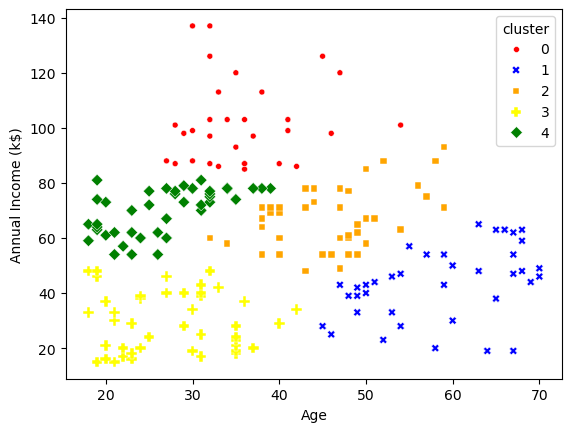

In [79]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=cust3, hue='cluster', size='cluster', style='cluster', palette=['red','blue','orange','yellow','green'])